<center><h1 style="font-size:300%;"><b style="color:red;">Welcome! to Admission Predictrion</b></h1></center>

**Data Description**

The dataset contains several parameters which are considered important during the application for Masters Programs.
The parameters included are :

* GRE Scores ( out of 340 )
* TOEFL Scores ( out of 120 )
* University Rating ( out of 5 )
* Statement of Purpose(SOP) and (LOR)Letter of Recommendation Strength ( out of 5 )
* Undergraduate GPA ( out of 10 )
* Research Experience ( either 0 or 1 )
* Chance of Admit ( ranging from 0 to 1 ) **outcome feature to predict**


In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
plt.style.use("dark_background")
import warnings as w
w.filterwarnings("ignore")

df=pd.read_csv("../input/graduate-admissions/Admission_Predict.csv")

In [40]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [41]:
#LOR = Letter of Recommendation
#SOP = Statement of Purpose
df.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67
399,400,333,117,4,5.0,4.0,9.66,1,0.95


In [42]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


# Data Pre-Processing

In [43]:
df.shape #checking shape of data set

(400, 9)

In [44]:
#count NA values in data frame
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [45]:
#fillinf missing values using fill na
df['University Rating'].fillna(df['University Rating'].mean(),inplace=True)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [47]:
df.drop(["Serial No."],axis=1,inplace = True)

df=df.rename(columns = {'Chance of Admit ':'Chance of Admit'})

# Data Visualization

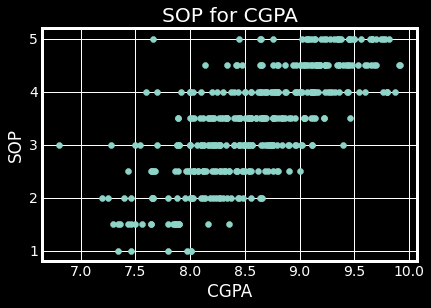

In [48]:
plt.scatter(df["CGPA"],df.SOP)
plt.xlabel("CGPA")
plt.ylabel("SOP")
plt.title("SOP for CGPA")
plt.show()


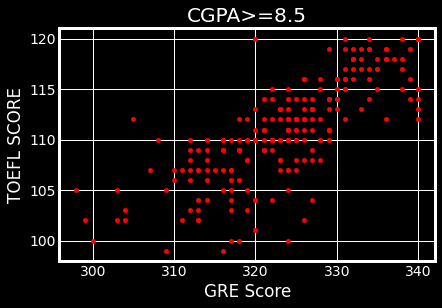

In [49]:
df[df.CGPA >= 8.5].plot(kind='scatter', x='GRE Score', y='TOEFL Score',color="red")
plt.xlabel("GRE Score")
plt.ylabel("TOEFL SCORE")
plt.title("CGPA>=8.5")
plt.grid(True)
plt.show()

**By the scater plot we can see data distribution**

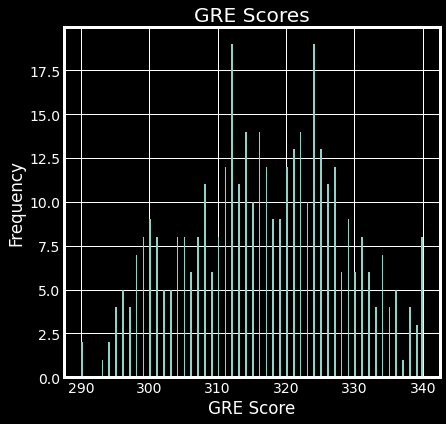

In [50]:
df["GRE Score"].plot(kind = 'hist',bins = 200,figsize = (6,6))
plt.title("GRE Scores")
plt.xlabel("GRE Score")
plt.ylabel("Frequency")
plt.show()

**By the histogram we can see frequency of data and identfy outliers**

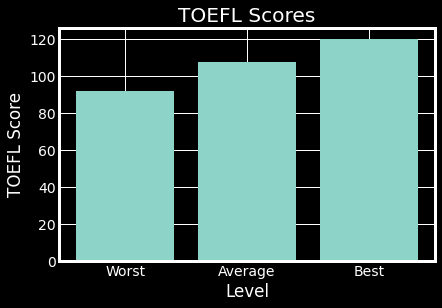

In [51]:

y = np.array([df["TOEFL Score"].min(),df["TOEFL Score"].mean(),df["TOEFL Score"].max()])
x = ["Worst","Average","Best"]
plt.bar(x,y)
plt.title("TOEFL Scores")
plt.xlabel("Level")
plt.ylabel("TOEFL Score")
plt.show()


**here by the bar plot we idintfy worst ,average and best Toefal score**

<AxesSubplot:xlabel='University Rating', ylabel='GRE Score'>

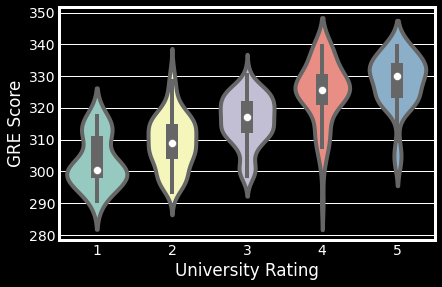

In [52]:
sns.violinplot(x="University Rating",y="GRE Score",data=df)

**Swarm Plot**

<AxesSubplot:xlabel='University Rating', ylabel='TOEFL Score'>

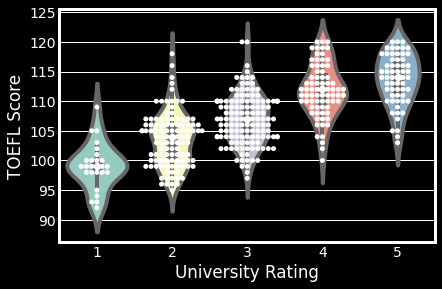

In [53]:
sns.violinplot(x="University Rating",y="TOEFL Score",data=df)
sns.swarmplot(x="University Rating",y="TOEFL Score",data=df,color="white")

<AxesSubplot:xlabel='University Rating', ylabel='GRE Score'>

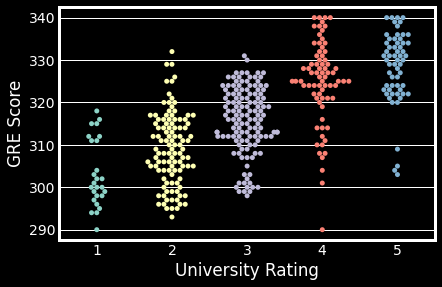

In [54]:
sns.swarmplot(x="University Rating",y="GRE Score",data=df)

# Pair Plot

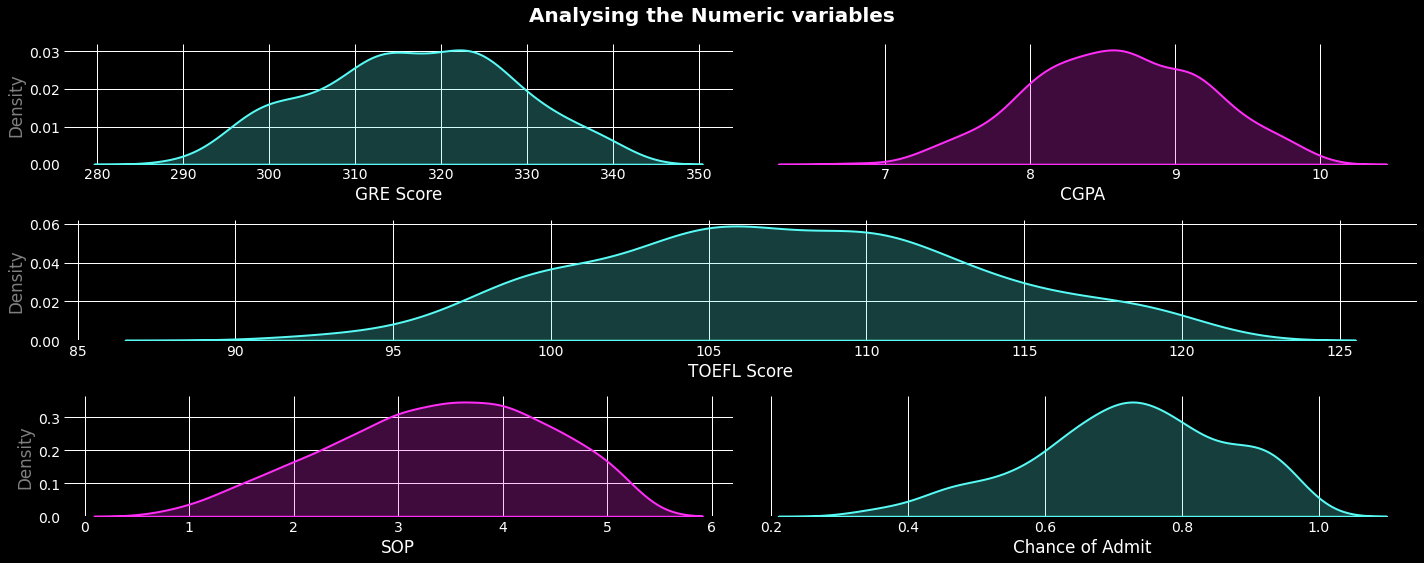

In [55]:
#integer columns
colors = ['#58FAF4','#FE2EF7']
fig=plt.figure(figsize=(20,8), tight_layout=True)
plt.suptitle("Analysing the Numeric variables", size=20, weight='bold')
ax=fig.subplot_mosaic("""AB
                         CC
                         DE""")
sns.kdeplot(df["GRE Score"], ax=ax['A'], color=colors[0], fill=True, linewidth=2)
sns.kdeplot(df['CGPA'], ax=ax['B'], color=colors[1],fill=True, linewidth=2)
sns.kdeplot(df['TOEFL Score'], ax=ax['C'], color=colors[0],fill=True, linewidth=2)
sns.kdeplot(df['SOP'], ax=ax['D'], color=colors[1],fill=True, linewidth=2)
sns.kdeplot(df['Chance of Admit'], ax=ax['E'], color=colors[0],fill=True, linewidth=2)
ax['B'].yaxis.set_visible(False)
ax['E'].yaxis.set_visible(False)
ax['A'].yaxis.label.set_alpha(0.5)
ax['C'].yaxis.label.set_alpha(0.5)
ax['A'].yaxis.label.set_alpha(0.5)
ax['C'].yaxis.label.set_alpha(0.5)
ax['D'].yaxis.label.set_alpha(0.5)
for s in ['left','right','top','bottom']:
    ax['A'].spines[s].set_visible(False)
    ax['B'].spines[s].set_visible(False)
    ax['C'].spines[s].set_visible(False)
    ax['D'].spines[s].set_visible(False)
    ax['E'].spines[s].set_visible(False)

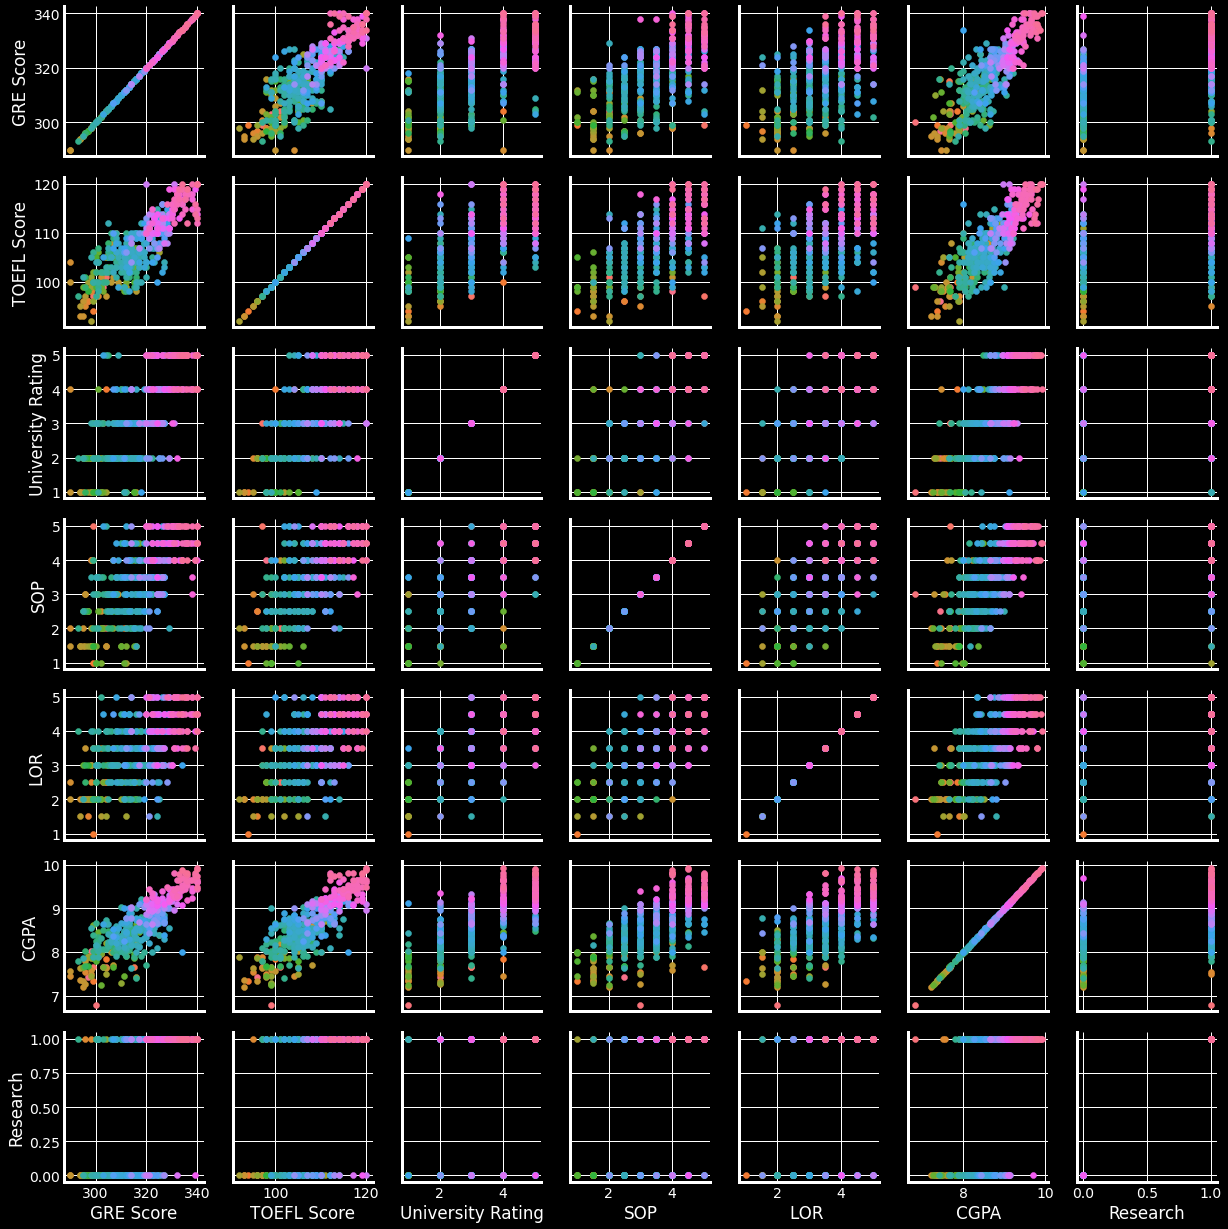

In [56]:
df_p=sns.PairGrid(df,hue="Chance of Admit")
df_p.map(plt.scatter)

**By Pair plot we can see data distribution for each feature**

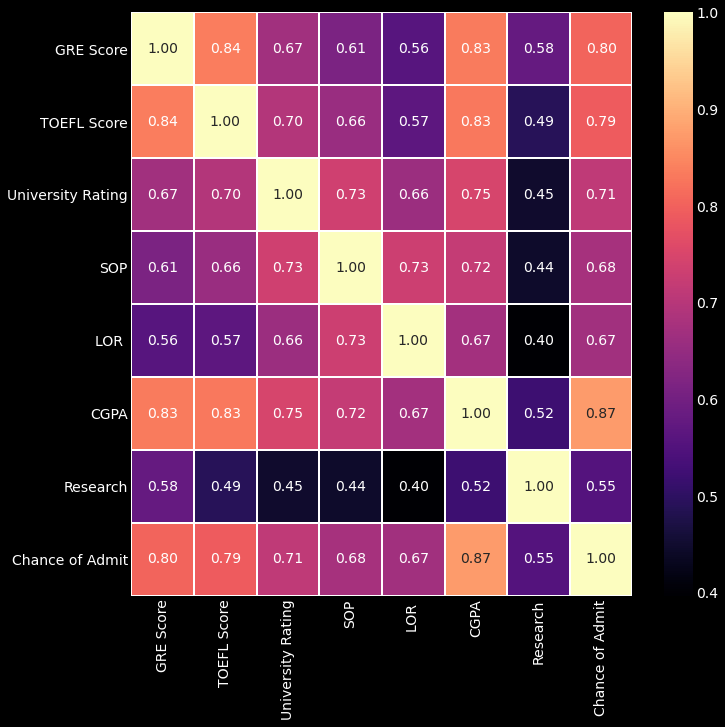

In [57]:
#checking feature dependance on outcome

plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")
plt.show()

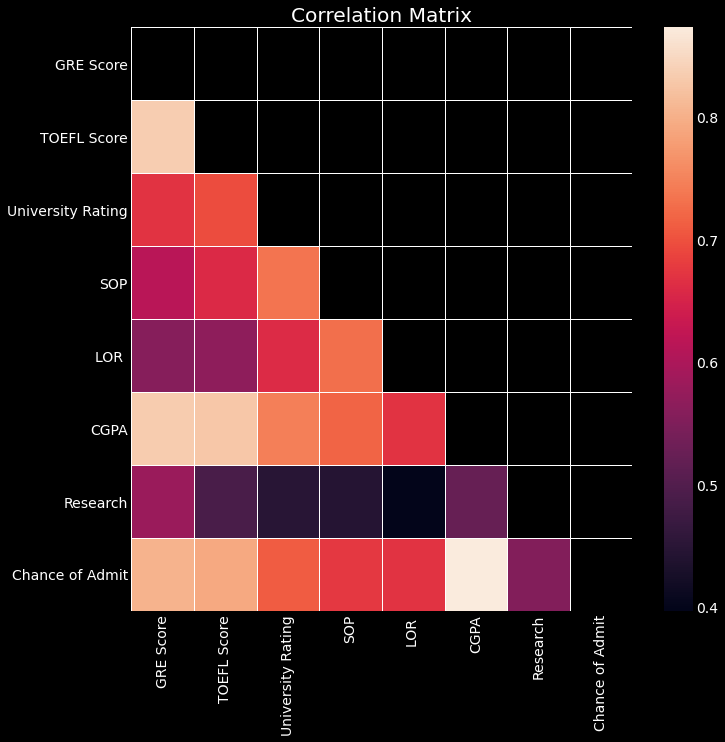

In [58]:
corr=df.corr()
mask=np.triu(np.ones_like(corr,dtype=bool))
plt.figure(figsize=(10,10))
plt.title("Correlation Matrix")
sns.heatmap(corr,mask=mask,cmap="rocket",linewidths=.5)
plt.show()

In [59]:
#finding correlation
var = df[df.columns[1:]].corr()['Chance of Admit'][:]
var.sort_values(ascending=False)

Chance of Admit      1.000000
CGPA                 0.873289
TOEFL Score          0.791594
University Rating    0.711250
SOP                  0.675732
LOR                  0.669889
Research             0.553202
Name: Chance of Admit, dtype: float64

* We can see all features normally corelated, so we didn't remove any fo them

In [60]:
df.Research.value_counts()

1    219
0    181
Name: Research, dtype: int64

<AxesSubplot:xlabel='University Rating', ylabel='Chance of Admit'>

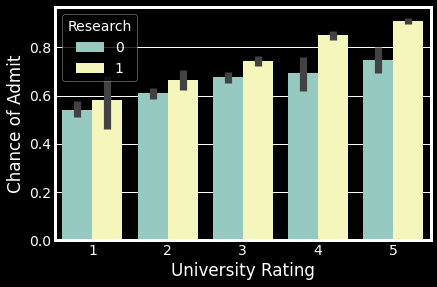

In [61]:
sns.barplot(x="University Rating", y="Chance of Admit", hue="Research", data=df)

<center><h4 style="font-size:300%;"><b style="color:#FE2EF7;">Model Buliding</b></h4></center>

In [62]:

y = df["Chance of Admit"]

x = df.drop(["Chance of Admit"],axis=1)

**Partition preprocessed data into a training set(80%) and testing set(20%)**

In [63]:

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20,random_state=1)


In [64]:
#using minmax Scaler for scaling the data in same Scale
from sklearn.preprocessing import MinMaxScaler
scalerX = MinMaxScaler(feature_range=(0, 1))
x_train[x_train.columns] = scalerX.fit_transform(x_train[x_train.columns])
x_test[x_test.columns] = scalerX.transform(x_test[x_test.columns])



# 
<center><h6 style="font-size:300%;"><b style="color:#FE2EF7;">Training the defferent ML Algo</b></h6></center>

**LinearRegression**

In [65]:
#fiting the data in Algo
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)




LinearRegression()

In [66]:
#making prediction on test data 
y_predict = model.predict(x_test)

#Evaluating the model performance
score=model.score(x_test, y_test)
print(score)


0.8079043677020102


In [67]:
print (y_predict[0:5])

print(y_test[0:5])

[0.7226944  0.69413229 0.78864499 0.78216045 0.85343383]
398    0.67
125    0.64
328    0.80
339    0.81
172    0.86
Name: Chance of Admit, dtype: float64


**RandomForestRegressor**

In [68]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 100, random_state = 42)
rfr.fit(x_train,y_train)


RandomForestRegressor(random_state=42)

In [69]:
y_predict_rfr = rfr.predict(x_test) 

score_rfr=rfr.score(x_test, y_test)
print(score_rfr)

0.7702296190401554


In [70]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state = 42)
dtr.fit(x_train,y_train)
y_predict_dtr = dtr.predict(x_test) 

score_dtr=dtr.score(x_test, y_test)
print(score_dtr)

0.6447941973683855


In [71]:
#evaluating LinearRegression perpormance
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict})
df.head()

,Actual,Predicted
398,0.67,0.722694
125,0.64,0.694132
328,0.80,0.788645
339,0.81,0.782160
172,0.86,0.853434


In [72]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

print('Mean Absolute Error:', mean_absolute_error(y_test, y_predict))  
print('Mean Squared Error:', mean_squared_error(y_test, y_predict))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_predict)))

Mean Absolute Error: 0.04495779899577677
Mean Squared Error: 0.00444267972999474
Root Mean Squared Error: 0.06665342999422265


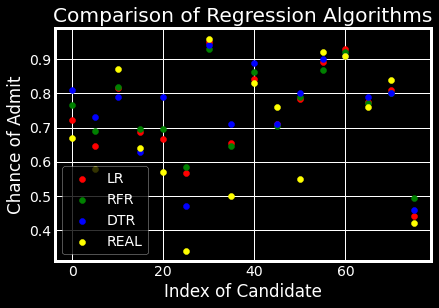

In [73]:
red = plt.scatter(np.arange(0,80,5),y_predict[0:80:5],color = "red")
green = plt.scatter(np.arange(0,80,5),y_predict_rfr[0:80:5],color = "green")
blue = plt.scatter(np.arange(0,80,5),y_predict_dtr[0:80:5],color = "blue")
black = plt.scatter(np.arange(0,80,5),y_test[0:80:5],color = "yellow")
plt.title("Comparison of Regression Algorithms")
plt.xlabel("Index of Candidate")
plt.ylabel("Chance of Admit")
plt.legend((red,green,blue,black),('LR', 'RFR', 'DTR', 'REAL'))
plt.show()

**Now we can see LinearRegression give good score**


<center><h1 style="font-size:300%;"><b style="color:#FE2EF7;">If you like please do a up vote</b></h1></center>

### Thanks